In [67]:
!pip install pycaret

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pycaret.classification import *

In [69]:
df = pd.read_csv('data/6 class.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.0,10497.462500,9552.425037,1939.00000,3344.250000,5776.0000,15055.5000,40000.00
Luminosity(L/Lo),240.0,107188.361635,179432.244940,0.00008,0.000865,0.0705,198050.0000,849420.00
Radius(R/Ro),240.0,237.157781,517.155763,0.00840,0.102750,0.7625,42.7500,1948.50
Absolute magnitude(Mv),240.0,4.382396,10.532512,-11.92000,-6.232500,8.3130,13.6975,20.06
Star type,240.0,2.500000,1.711394,0.00000,1.000000,2.5000,4.0000,5.00


# Outlier

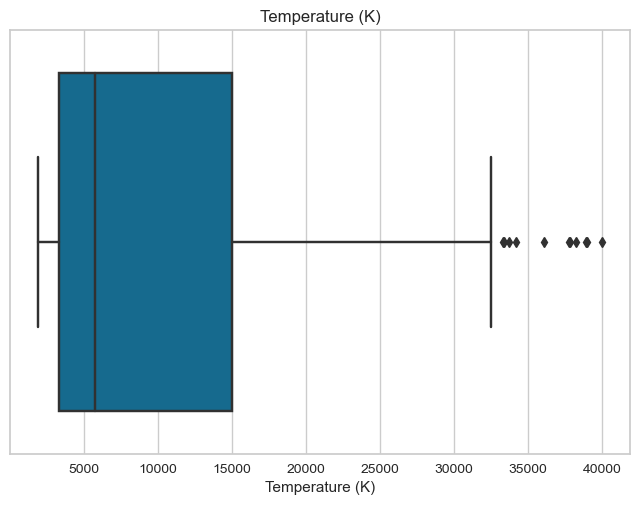

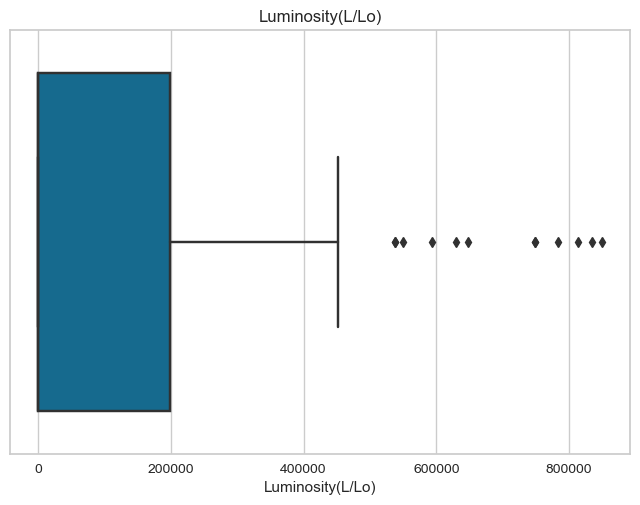

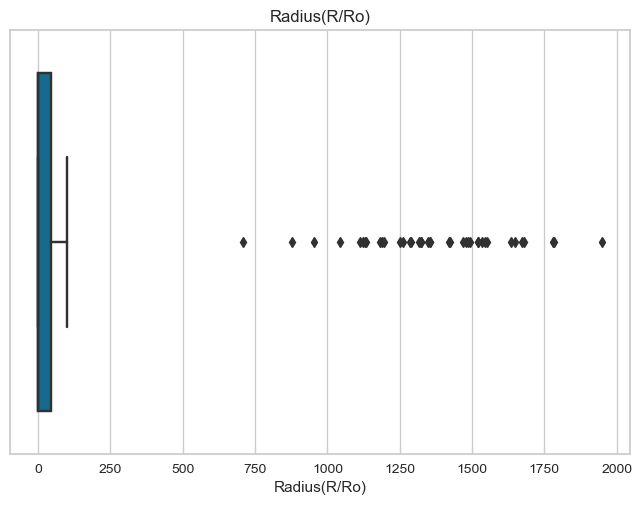

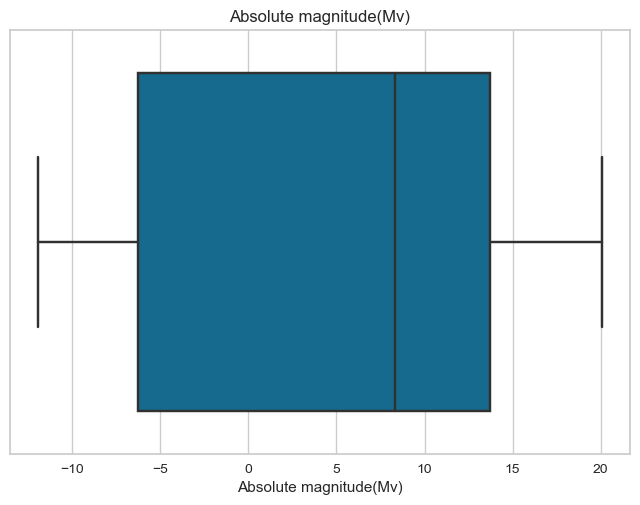

In [72]:
for col in df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]:
    ax = sns.boxplot(df[col])
    ax.set_title(col)
    plt.show()

In [73]:
Q1 = df['Radius(R/Ro)'].quantile(0.25)
Q3 = df['Radius(R/Ro)'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sem_outlier = df[(df['Radius(R/Ro)'] >= limite_inferior) & (df['Radius(R/Ro)'] <= limite_superior)]

In [74]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [75]:
list_str = ['Star color', 'Spectral Class']
le = LabelEncoder()

for c in list_str:
    df[c] = le.fit_transform(df[c])

In [76]:
X = df.drop('Star color', axis = 1)
y = df['Star color']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [77]:
train_dados = pd.concat([xtrain, ytrain], axis = 1)

s = setup(data = train_dados, target = 'Star type', session_id = 0, normalize = True)

compare_models()

,Description,Value
0,Session id,0
1,Target,Star type
2,Target type,Multiclass
3,Original data shape,"(192, 7)"
4,Transformed data shape,"(192, 7)"
5,Transformed train set shape,"(134, 7)"
6,Transformed test set shape,"(58, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9929,1.0000,0.9929,0.9946,0.9922,0.9913,0.9919,0.3690
dt,Decision Tree Classifier,0.9923,0.9955,0.9923,0.9949,0.9918,0.9907,0.9914,0.2930
gbc,Gradient Boosting Classifier,0.9923,1.0000,0.9923,0.9949,0.9918,0.9907,0.9914,0.4260
et,Extra Trees Classifier,0.9923,1.0000,0.9923,0.9949,0.9918,0.9907,0.9914,0.3390
xgboost,Extreme Gradient Boosting,0.9852,1.0000,0.9852,0.9895,0.9840,0.9820,0.9833,0.3590
nb,Naive Bayes,0.9769,1.0000,0.9769,0.9846,0.9754,0.9721,0.9741,0.3030
lightgbm,Light Gradient Boosting Machine,0.9703,0.9987,0.9703,0.9812,0.9687,0.9639,0.9667,0.5090
knn,K Neighbors Classifier,0.9555,0.9839,0.9555,0.9723,0.9543,0.9464,0.9504,0.3060
lda,Linear Discriminant Analysis,0.9538,0.9993,0.9538,0.9667,0.9518,0.9444,0.9475,0.3150
lr,Logistic Regression,0.9319,0.9980,0.9319,0.9565,0.9291,0.9178,0.9238,0.9430


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [78]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9286,1.0000,0.9286,0.9464,0.9218,0.9130,0.9188
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [79]:
preds = predict_model(rf)
preds

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Spectral Class,Star color,Star type,prediction_label,prediction_score
42,3270,150000.000000,88.00000,-6.020000,5,10,4,4,0.87
236,30839,834042.000000,1194.00000,-10.630000,6,0,5,5,0.95
63,2835,0.000340,0.09180,16.959999,5,10,0,0,1.00
180,2831,0.000231,0.09150,16.209999,5,10,0,0,1.00
237,8829,537493.000000,1423.00000,-10.730000,0,11,5,5,0.99
9,2700,0.000180,0.13000,16.049999,5,10,0,0,0.98
114,3610,132000.000000,1522.00000,-10.860000,5,10,5,5,0.99
158,13023,998.000000,6.21000,-1.380000,0,6,3,3,1.00
6,2637,0.000730,0.12700,17.219999,5,10,0,0,0.95
139,3541,0.001300,0.25600,14.330000,5,10,1,1,0.98


# Visualization

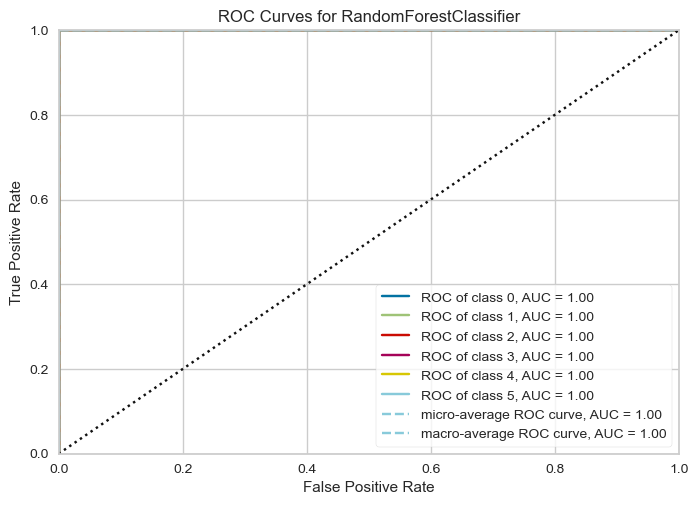

In [80]:
plot_model(rf)

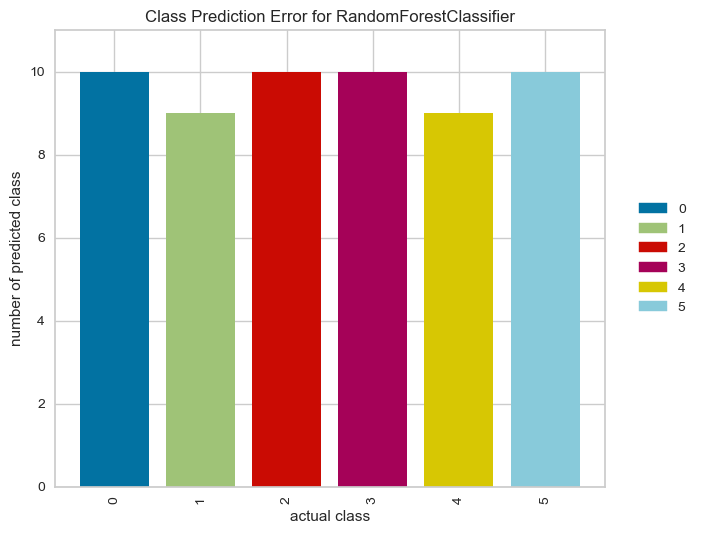

In [81]:
plot_model(rf, plot = 'error')

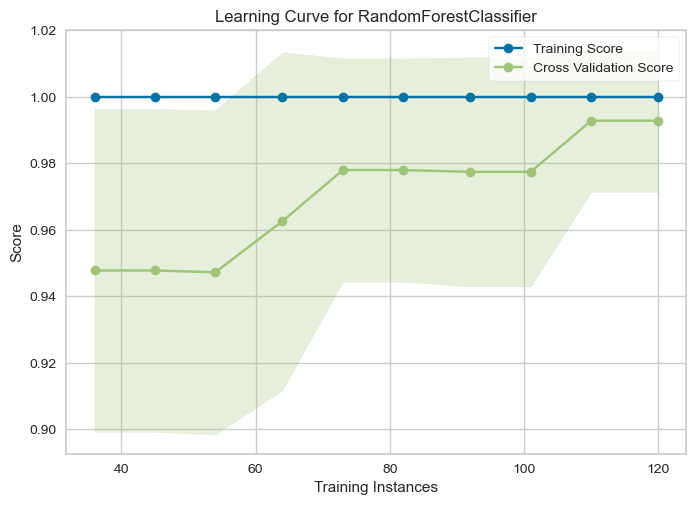

In [82]:
plot_model(rf, plot = 'learning')

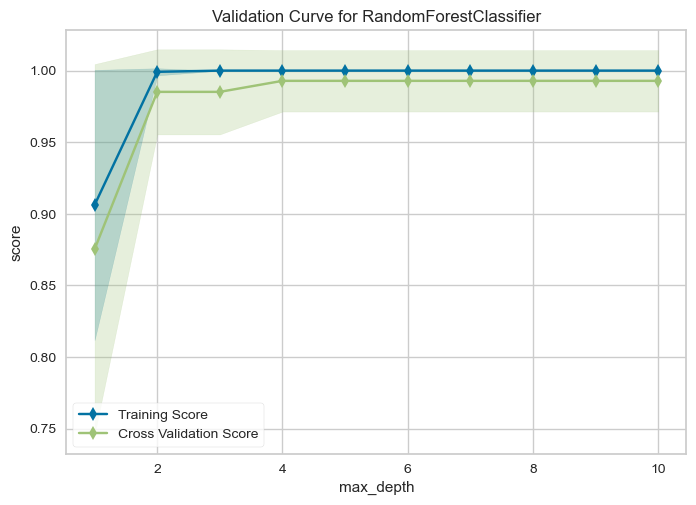

In [83]:
plot_model(rf, plot = 'vc')

## 🏁 The End! Feel free to criticize! 🏁